In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,lognorm,boxcox
import sklearn
sklearn.set_config(transform_output="pandas")
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Dataset for ML/ai4e-ml01/train.csv').iloc[:,1::]
test=pd.read_csv('/content/drive/MyDrive/Dataset for ML/ai4e-ml01/test.csv').iloc[:,1::]
submission=pd.read_csv('/content/drive/MyDrive/Dataset for ML/ai4e-ml01/sample_submission.csv')

In [ ]:
train.head()

,brand,engine_capacity,fuels,km_driven,model,origin,price,seats,source_url,transmission,type,year
0,hyundai,1.6,gasoline,160000.0,Elantra,domestic,245000000,4,https://bonbanh.com/xe-hyundai-elantra-1.6-mt-...,manual,sedan,2011
1,mazda,2.0,gasoline,1000.0,3,domestic,748000000,4,https://bonbanh.com/xe-mazda-3-2.0l-signature-...,automatic,sedan,2020
2,NaN,1.2,Xăng,31000.0,NaN,Lắp ráp trong nước,145000000,NaN,https://www.sanxehot.vn/mua-ban-xe/chevrolet-s...,Số sàn,Hatchback,2011
3,NaN,3.2,Diesel,18000.0,NaN,Nhập khẩu,848000000,NaN,https://www.sanxehot.vn/mua-ban-xe/ford-ranger...,Tự động,Bán tải,2016
4,toyota,2.0,gasoline,20.0,innova,imported,185000000,8,https://xe.chotot.com/mua-ban-oto-cu-sdca1-huy...,manual,Minivan (MPV),2008.0


In [ ]:
test.head()

,brand,engine_capacity,fuels,km_driven,model,origin,seats,source_url,transmission,type,year
0,NaN,NaN,Xăng,10000.0,NaN,Nhập khẩu,NaN,https://www.sanxehot.vn/mua-ban-xe/chevrolet-s...,Tự động,Hatchback,2011
1,toyota,2.4,gasoline,111000.0,camry,domestic,5,https://xe.chotot.com/mua-ban-oto-cu-sdca1-qua...,automatic,Sedan,2013.0
2,ford,1.7,gasoline,270000.0,laser,domestic,5,https://xe.chotot.com/mua-ban-oto-cu-sdca1-tha...,semi-automatic,Sedan,2004.0
3,toyota,2.0,gasoline,0.0,Innova,domestic,5,https://bonbanh.com/xe-toyota-innova-e-2.0-mt-...,manual,crossover,2022
4,mitsubishi,2.0,gasoline,10000.0,jolie,imported,NaN,https://xe.chotot.com/mua-ban-oto-cu-sdca1-huy...,manual,NaN,2002.0


In [ ]:
submission.head()

,Id,price
0,0,1000000
1,1,1000000
2,2,1000000
3,3,1000000
4,4,1000000


từ đây có thể nhận thấy output của model sẽ là trường Price và input của model sẽ là các trường còn lại

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            43289 non-null  object 
 1   engine_capacity  48965 non-null  object 
 2   fuels            48757 non-null  object 
 3   km_driven        49675 non-null  float64
 4   model            43308 non-null  object 
 5   origin           49999 non-null  object 
 6   price            50000 non-null  int64  
 7   seats            41813 non-null  object 
 8   source_url       50000 non-null  object 
 9   transmission     49979 non-null  object 
 10  type             48178 non-null  object 
 11  year             49980 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.6+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8729 entries, 0 to 8728
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            7574 non-null   object 
 1   engine_capacity  8524 non-null   float64
 2   fuels            8521 non-null   object 
 3   km_driven        8667 non-null   float64
 4   model            7576 non-null   object 
 5   origin           8729 non-null   object 
 6   seats            7348 non-null   object 
 7   source_url       8729 non-null   object 
 8   transmission     8726 non-null   object 
 9   type             8443 non-null   object 
 10  year             8727 non-null   object 
dtypes: float64(2), object(9)
memory usage: 750.3+ KB


In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8729 entries, 0 to 8728
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      8729 non-null   int64
 1   price   8729 non-null   int64
dtypes: int64(2)
memory usage: 136.5 KB


nhận thấy trường source_url là đường dẫn về thông tin của data,điều này thực sự k ảnh hưởng hay ảnh hưởng rất ít đến output của bài toán nên chúng ta có thể drop cột này khỏi data

In [ ]:
train=train.drop(columns=['source_url'])
test=test.drop(columns=['source_url'])

In [ ]:
X_test=test
train['origin'][train['origin'].isnull()==True].index


Int64Index([8766], dtype='int64')

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8729 entries, 0 to 8728
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            7574 non-null   object 
 1   engine_capacity  8524 non-null   float64
 2   fuels            8521 non-null   object 
 3   km_driven        8667 non-null   float64
 4   model            7576 non-null   object 
 5   origin           8729 non-null   object 
 6   seats            7348 non-null   object 
 7   transmission     8726 non-null   object 
 8   type             8443 non-null   object 
 9   year             8727 non-null   object 
dtypes: float64(2), object(8)
memory usage: 682.1+ KB


In [ ]:
train=train.drop([8766]).reset_index().iloc[:,1:]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            43289 non-null  object 
 1   engine_capacity  48965 non-null  object 
 2   fuels            48756 non-null  object 
 3   km_driven        49674 non-null  float64
 4   model            43308 non-null  object 
 5   origin           49999 non-null  object 
 6   price            49999 non-null  int64  
 7   seats            41813 non-null  object 
 8   transmission     49978 non-null  object 
 9   type             48177 non-null  object 
 10  year             49979 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.2+ MB


In [ ]:
num_conti_vars=['km_driven']
cate_vars=train.select_dtypes(include=['object']).columns.to_list()

In [ ]:
print(num_conti_vars,cate_vars,sep='\n')

['km_driven']
['brand', 'engine_capacity', 'fuels', 'model', 'origin', 'seats', 'transmission', 'type', 'year']


In [ ]:
train_dropna=train.dropna()


phân phối của biến outptut và biến continious

<ipython-input-192-c20bf9daaeb3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['price'])


<Axes: xlabel='price', ylabel='Density'>

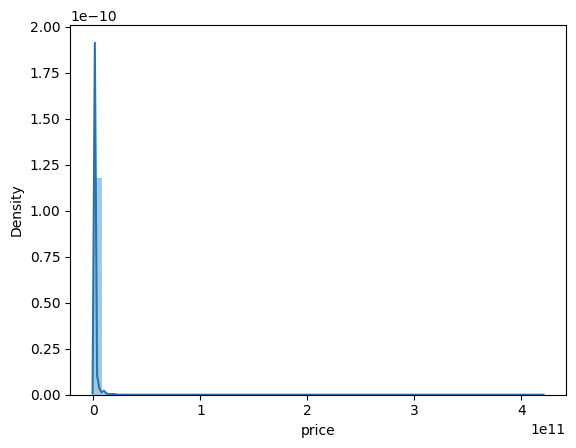

In [ ]:
sns.distplot(train['price'])

<ipython-input-193-315304821366>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['km_driven'],fit=norm,ax=ax1)
<ipython-input-193-315304821366>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['km_driven'],fit=lognorm,ax=ax2)


Text(0.5, 1.0, 'fit vs lognorm')

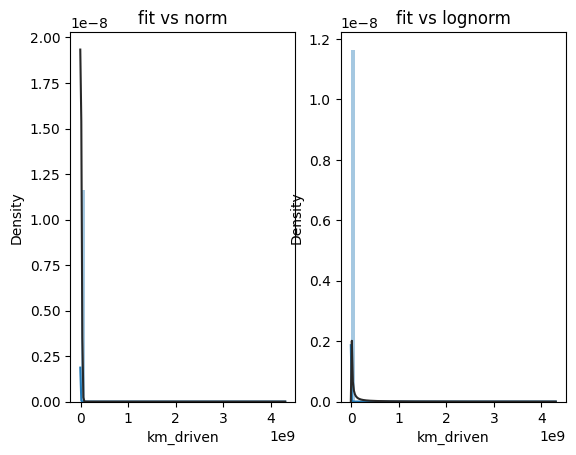

In [ ]:
f, (ax1,ax2)=plt.subplots(1,2)
sns.distplot(train['km_driven'],fit=norm,ax=ax1)
ax1.set_title('fit vs norm')
sns.distplot(train['km_driven'],fit=lognorm,ax=ax2)
ax2.set_title('fit vs lognorm')

trường km_driven tuân theo phân phối lognorm

phân bố của 1 vài biến categorical

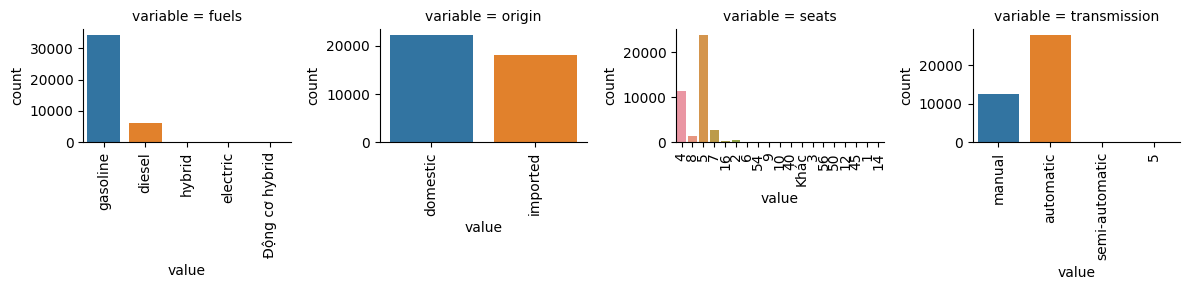

In [ ]:
cat=[i for i in cate_vars if train[i].nunique()<20]
def countplot(X,**kwargs):
  sns.countplot(x=X)
  plt.xticks(rotation=90)
f = pd.melt(train_dropna, value_vars=cat)
grid = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(countplot,'value')
plt.show()

In [ ]:
def fix_value(X):
    error_value=['222222','1.7000000000000002','1.6cm3','2.0l','2..4','0.7000000000000001','1.8l','2.0AT', '5.9', '2.7V',
       '2.7l', '1.2AT', '1998', '1.0l', '1.2l', '3900', '4.4l', '1.8AT',
       '1.25l', '2000', 'V8', '1600', '2.4l', '1.5G', '2.4AT', '6.1', '1']
    X=X[X['engine_capacity'].isin(error_value)==False]
    X['km_driven'][X['km_driven']<0]=np.NaN
    X['km_driven'][X['km_driven']==0]=1
    X['fuels'].replace({'Động cơ hybrid':'hybrid'},inplace=True)
    X['fuels']=X['fuels'].str.lower()
    X['model']=X['model'].str.lower()
    X['origin'].replace({'Nhập khẩu':'imported',
                         'Lắp ráp trong nước':'domestic'},inplace=True)
    X['seats'].replace({'Khác':np.NaN},inplace=True)
    X['transmission'].replace({'Số sàn':'manual',
                               'Tự động':'automatic',
                               'Vô cấp':'vô cấp'},inplace=True)
    X['type']=X['type'].str.lower()
    X=X[X['year'].isin(['12/2014','2007\t','2009\t','2011\t','20114','Trước 1980'])==False]
    X['year'].replace({'2011\t\t':'2011','20008':'2008','2.0L':'NaN'},inplace=True)
    return X

train=fix_value(train).reset_index().iloc[:,1::]
X_test=fix_value(X_test)
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49946 entries, 0 to 49945
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            43272 non-null  object 
 1   engine_capacity  48914 non-null  object 
 2   fuels            48703 non-null  object 
 3   km_driven        49621 non-null  float64
 4   model            43291 non-null  object 
 5   origin           49946 non-null  object 
 6   price            49946 non-null  int64  
 7   seats            41700 non-null  object 
 8   transmission     49926 non-null  object 
 9   type             48124 non-null  object 
 10  year             49926 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.2+ MB


<ipython-input-195-f05fc90bad2d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['km_driven'][X['km_driven']<0]=np.NaN
<ipython-input-195-f05fc90bad2d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['km_driven'][X['km_driven']<0]=np.NaN
<ipython-input-195-f05fc90bad2d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['km_driven'][X['km_driven']==0]=1
<ipython-input-195-f05fc90bad2d>:7: SettingWithCopyWarning: 
A value is tryin

Chuyển các trường có bản chất là dữ liệu dạng float về lại chính float

In [ ]:
train['engine_capacity']=train['engine_capacity'].astype('float64')
X_test['engine_capacity']=X_test['engine_capacity'].astype('float64')
#train['year']=train['year'].astype('float64')
#X_test['year']=X_test['year'].astype('float64')



In [ ]:
numeric_vars=['engine_capacity','km_driven']
category_vars=['brand','fuels','model','origin','transmission','type','seats','year']


fill dữ liệu

In [ ]:
train[numeric_vars]=train.groupby('origin')[numeric_vars].transform(lambda x:x.fillna(x.mean()))
X_test[numeric_vars]=X_test.groupby('origin')[numeric_vars].transform(lambda x:x.fillna(x.mean()))
train[category_vars]=train.groupby('origin')[category_vars].transform(lambda x:x.fillna(x.value_counts()[0]))
X_test[category_vars]=X_test.groupby('origin')[category_vars].transform(lambda x:x.fillna(x.value_counts()[0]))



In [ ]:
train['seats'].unique()

array(['4', 12624, 11984, '8', '5', '7', '16', '2', '6', '54', '9', '10',
       '40', '3', '56', '50', '12', '45', '1', '14'], dtype=object)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49946 entries, 0 to 49945
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            49946 non-null  object 
 1   engine_capacity  49946 non-null  float64
 2   fuels            49946 non-null  object 
 3   km_driven        49946 non-null  float64
 4   model            49946 non-null  object 
 5   origin           49946 non-null  object 
 6   price            49946 non-null  int64  
 7   seats            49946 non-null  object 
 8   transmission     49946 non-null  object 
 9   type             49946 non-null  object 
 10  year             49946 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.2+ MB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8729 entries, 0 to 8728
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            8729 non-null   object 
 1   engine_capacity  8729 non-null   float64
 2   fuels            8729 non-null   object 
 3   km_driven        8729 non-null   float64
 4   model            8729 non-null   object 
 5   origin           8729 non-null   object 
 6   seats            8729 non-null   object 
 7   transmission     8729 non-null   object 
 8   type             8729 non-null   object 
 9   year             8729 non-null   object 
dtypes: float64(2), object(8)
memory usage: 750.1+ KB


xử lí outlier vs trường dữ liệu numerical

In [ ]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.DataFrame, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas dataframe of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25).to_numpy()
    Q3 = col.quantile(0.75).to_numpy()
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

In [ ]:
train['seats']=train['seats'].astype('float64')
X_test['seats']=X_test['seats'].astype('float64')
train['year']=train['year'].astype('float64')
X_test['year']=X_test['year'].astype('float64')
numeric_vars=numeric_vars+['seats','year']
category_vars.remove('seats')
category_vars.remove('year')
category_vars

['brand', 'fuels', 'model', 'origin', 'transmission', 'type']

In [ ]:
boc=BoxplotOutlierClipper()
train[numeric_vars]=boc.fit_transform(train[numeric_vars])
X_test[numeric_vars]=boc.transform(X_test[numeric_vars])


Boxcox vs trường numerical


In [ ]:
l1,opti_lambda1=boxcox(train['engine_capacity'])
l2,opti_lambda2=boxcox(train['km_driven'])
train['engine_capacity']=boxcox(train['engine_capacity'],lmbda=opti_lambda1)
train['km_driven']=boxcox(train['km_driven'],lmbda=opti_lambda2)
X_test['engine_capacity']=boxcox(X_test['engine_capacity'],lmbda=opti_lambda1)
X_test['km_driven']=boxcox(X_test['km_driven'],lmbda=opti_lambda2)

In [ ]:
from category_encoders import JamesSteinEncoder

In [ ]:
jse=JamesSteinEncoder()
train[category_vars]=jse.fit_transform(train[category_vars],train['price'])
X_test[category_vars]=jse.transform(X_test[category_vars])

In [ ]:
train.head()

,brand,engine_capacity,fuels,km_driven,model,origin,price,seats,transmission,type,year
0,4.920758e+08,0.501649,8.756280e+08,40.030345,5.466430e+08,6.298268e+08,245000000,4.0,3.335188e+08,8.177293e+08,2011.0
1,5.982519e+08,0.763432,8.756280e+08,13.292444,5.604542e+08,6.298268e+08,748000000,4.0,9.918630e+08,8.177293e+08,2020.0
2,6.047568e+08,0.186958,6.427725e+08,28.727887,6.048709e+08,6.298268e+08,145000000,10.0,3.335188e+08,3.372756e+08,2011.0
3,7.419450e+08,1.370142,7.182538e+08,25.636558,7.467702e+08,1.116030e+09,848000000,10.0,9.918630e+08,5.594795e+08,2016.0
4,5.989501e+08,0.763432,8.756280e+08,3.922712,4.207042e+08,1.116030e+09,185000000,8.0,3.335188e+08,4.858805e+08,2008.0


In [ ]:
X_test.head()

,brand,engine_capacity,fuels,km_driven,model,origin,seats,transmission,type,year
0,8.440266e+08,1.485311,6.427725e+08,22.604738,8.440266e+08,1.116030e+09,10.0,9.918630e+08,3.372756e+08,2011.0
1,5.989501e+08,0.989545,8.756280e+08,37.228188,6.789608e+08,6.298268e+08,5.0,9.918630e+08,8.177293e+08,2013.0
2,6.604486e+08,0.571193,8.756280e+08,40.744433,1.487583e+08,6.298268e+08,5.0,7.850056e+08,8.177293e+08,2004.0
3,5.989501e+08,0.763432,8.756280e+08,0.000000,4.207042e+08,6.298268e+08,5.0,3.335188e+08,5.395265e+08,2022.0
4,4.813057e+08,0.763432,8.756280e+08,22.604738,1.263137e+08,1.116030e+09,10.0,3.335188e+08,8.440266e+08,2002.0


Normalize dữ liệu

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

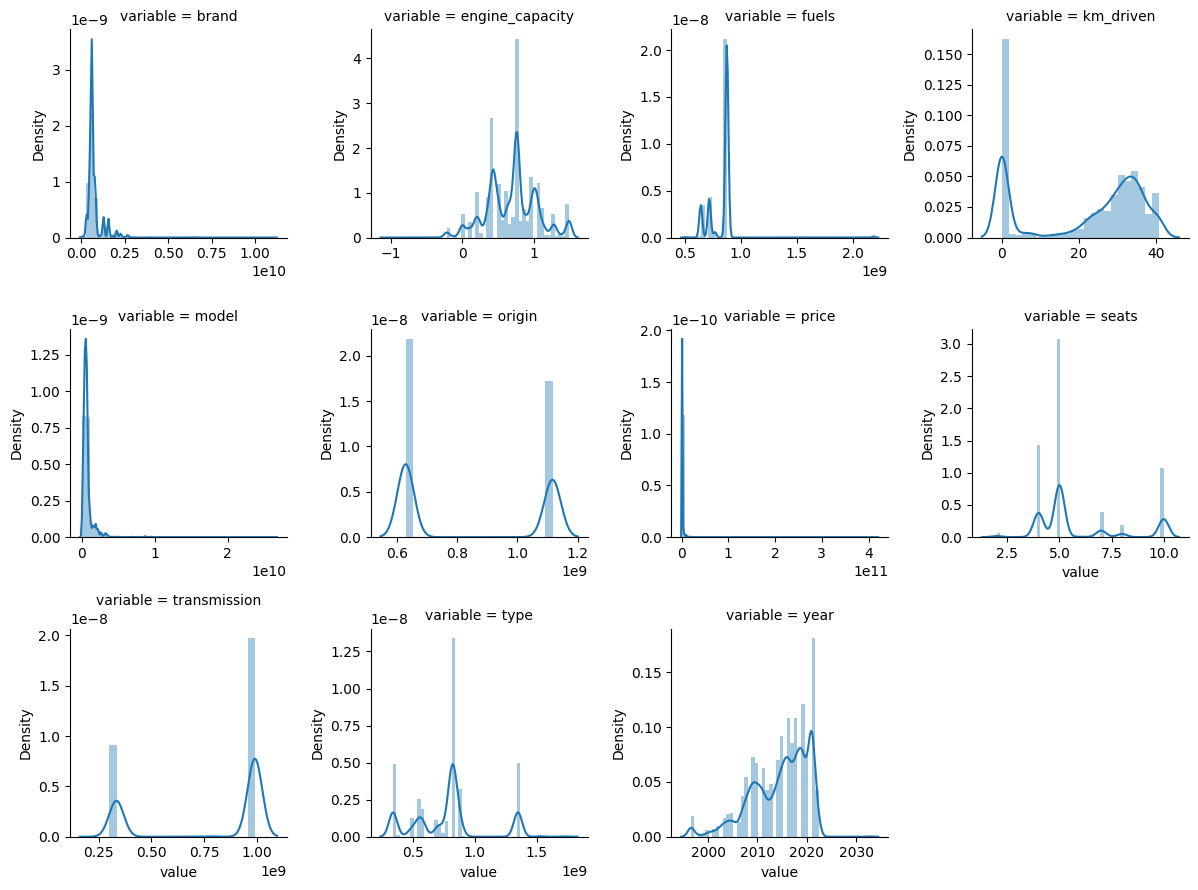

In [ ]:
f=pd.melt(train,value_vars=train.columns.to_list())
graph=sns.FacetGrid(f,col='variable',col_wrap=4,sharex=False,sharey=False)
graph.map(sns.distplot,'value')

Scaling data





In [ ]:
X_train=train.drop(columns=['price'])
y_train=train['price']


In [ ]:
scale=StandardScaler()
X_train[['km_driven','engine_capacity']]=scale.fit_transform(X_train[['km_driven','engine_capacity']])
X_test[['km_driven','engine_capacity']]=scale.transform(X_test[['km_driven','engine_capacity']])


In [ ]:
X_train.head()

,brand,engine_capacity,fuels,km_driven,model,origin,seats,transmission,type,year
0,4.920758e+08,-0.552506,8.756280e+08,1.211659,5.466430e+08,6.298268e+08,4.0,3.335188e+08,8.177293e+08,2011.0
1,5.982519e+08,0.194800,8.756280e+08,-0.554275,5.604542e+08,6.298268e+08,4.0,9.918630e+08,8.177293e+08,2020.0
2,6.047568e+08,-1.450849,6.427725e+08,0.465176,6.048709e+08,6.298268e+08,10.0,3.335188e+08,3.372756e+08,2011.0
3,7.419450e+08,1.926765,7.182538e+08,0.261006,7.467702e+08,1.116030e+09,10.0,9.918630e+08,5.594795e+08,2016.0
4,5.989501e+08,0.194800,8.756280e+08,-1.173109,4.207042e+08,1.116030e+09,8.0,3.335188e+08,4.858805e+08,2008.0


In [ ]:
y_test=submission['price']

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import Pool,CatBoostRegressor
cbr=CatBoostRegressor()
cbr.fit(Pool(X_train,y_train))


Learning rate set to 0.075953
0:	learn: 2409242652.2152758	total: 23.1ms	remaining: 23.1s
1:	learn: 2361617260.9717317	total: 49.5ms	remaining: 24.7s
2:	learn: 2318371549.0391154	total: 63ms	remaining: 20.9s
3:	learn: 2281373404.8517661	total: 68.6ms	remaining: 17.1s
4:	learn: 2246564013.6286035	total: 78.6ms	remaining: 15.6s
5:	learn: 2216351041.9682460	total: 94.8ms	remaining: 15.7s
6:	learn: 2190393882.0092616	total: 100ms	remaining: 14.2s
7:	learn: 2168187819.5361233	total: 106ms	remaining: 13.1s
8:	learn: 2149144815.6454830	total: 138ms	remaining: 15.2s
9:	learn: 2130262334.7437713	total: 159ms	remaining: 15.7s
10:	learn: 2114133674.5241923	total: 173ms	remaining: 15.5s
11:	learn: 2098552419.4573610	total: 185ms	remaining: 15.3s
12:	learn: 2085378906.6283662	total: 198ms	remaining: 15.1s
13:	learn: 2074604101.5207326	total: 213ms	remaining: 15s
14:	learn: 2062785519.9286828	total: 229ms	remaining: 15s
15:	learn: 2053355839.8841298	total: 249ms	remaining: 15.3s
16:	learn: 204451413

In [ ]:
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             r2_score)


In [ ]:
train_pred_catboost=cbr.predict(Pool(X_train))
test_pred_catboost=cbr.predict(Pool(X_test))

In [ ]:
print(mean_absolute_error(y_train,train_pred_catboost))
print(mean_absolute_error(y_test,test_pred_catboost))

112211046.60125943
867909505.4192702


In [ ]:
print(y_train[:10:])

0    245000000
1    748000000
2    145000000
3    848000000
4    185000000
5    415000000
6    185000000
7    260000000
8    338000000
9    555000000
Name: price, dtype: int64


In [ ]:
print(train_pred_catboost[:10:])

[2.75244721e+08 7.03732843e+08 2.15763964e+08 9.02211527e+08
 2.33442351e+08 4.41125103e+08 1.72539052e+08 1.14030531e+08
 3.50407266e+08 5.00336358e+08]


In [ ]:
!pip install numpy scipy scikit-learn pandas matplotlib
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lg=LGBMRegressor(n_estimators=1000)
lg.fit(X_train,y_train)
train_pred_lgbm=lg.predict(X_train)
test_pred_lgbm=lg.predict(X_test)

In [ ]:
print(mean_absolute_error(y_train,train_pred_lgbm))
print(mean_absolute_error(y_test,test_pred_lgbm))

110118064.21712737
872241041.2444564


In [ ]:
print(test_pred_lgbm)

[1.15934877e+09 6.01867789e+08 1.68654702e+08 ... 1.53019770e+08
 9.29393621e+08 9.16677036e+08]


In [ ]:
submiss=pd.DataFrame()
submiss['Id']=np.arange(8729)
submiss['price']=test_pred_lgbm

In [ ]:
print(submiss)

        Id         price
0        0  1.159349e+09
1        1  6.018678e+08
2        2  1.686547e+08
3        3  7.139722e+08
4        4  2.395292e+08
...    ...           ...
8724  8724  2.137167e+08
8725  8725  2.665286e+08
8726  8726  1.530198e+08
8727  8727  9.293936e+08
8728  8728  9.166770e+08

[8729 rows x 2 columns]


In [ ]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
test_pred_lgbm

array([1159348774.167160, 601867789.490763, 168654702.172326, ...,
       153019769.886311, 929393620.792852, 916677036.104526])

In [ ]:
from google.colab import files
submiss.to_csv('output.csv', encoding = 'utf-8-sig')
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_pred_lgbm

array([1159348774.167160, 601867789.490763, 168654702.172326, ...,
       153019769.886311, 929393620.792852, 916677036.104526])

In [ ]:
test_pred_lgbm1=test_pred_lgbm
test_pred_lgbm1

array([1159348774.167160, 601867789.490763, 168654702.172326, ...,
       153019769.886311, 929393620.792852, 916677036.104526])

In [ ]:
x=pd.DataFrame()

x['price']=test_pred_lgbm1
x

,price
0,1.159349e+09
1,6.018678e+08
2,1.686547e+08
3,7.139722e+08
4,2.395292e+08
...,...
8724,2.137167e+08
8725,2.665286e+08
8726,1.530198e+08
8727,9.293936e+08
